In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv('diabetes3.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)
data_scaled[0]

array([ 0.63994726,  0.84832379,  0.14964075,  0.90726993, -0.69289057,
        0.20401277,  0.46849198,  1.4259954 ,  1.36589591])

In [15]:
x = data.drop(['Outcome'],axis=1)
y = data['Outcome']

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [18]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
predicted_value = logreg.predict(X_test)

[0 1 0 0 1 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 1 1 1 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1
 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 1 1 1 0 1 0 0 1 0
 0 1 1 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1
 0 0 0 0 0 0]


C:\Users\adity\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [28]:
new_data = [[6,148,72,35,0,33.6,0.627,50]]
newValurpredict = logreg.predict(new_data)
print(newValurpredict)

[1]


C:\Users\adity\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [19]:
from sklearn.metrics import confusion_matrix
conf = confusion_matrix(y_test, predicted_value, labels=[0, 1])
print("Confusion Matrix we want is: \n", conf)

TP = conf[0][0]
TN = conf[1][1]
FP = conf[1][0]
FN = conf[0][1]

print("True Positives", TP)
print("True Negatives", TN)
print("False Positives", FP)
print("False Negatives", FN)


Confusion Matrix we want is: 
 [[90 14]
 [25 25]]
True Positives 90
True Negatives 25
False Positives 25
False Negatives 14


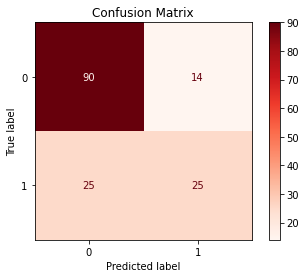

In [20]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(conf)
disp.plot(cmap='Reds')
plt.title("Confusion Matrix")
plt.show()


In [22]:
from sklearn.metrics import f1_score, precision_score, recall_score, matthews_corrcoef
print(f"Recall Score: {recall_score(y_test, predicted_value):.3}")
print(f"Specitivity Score: {TN/(TN+FP):.3}")
print(f"Precision Score: {precision_score(y_test, predicted_value):.3}")
print(f"Negative Prediction Value: {TN/(TN+FN):.3}")
print(f"F1 Score: {f1_score(y_test, predicted_value):.3}")
print(f"Matthews Correlation Coefficient: {matthews_corrcoef(y_test, predicted_value):.3}")


Recall Score: 0.5
Specitivity Score: 0.5
Precision Score: 0.641
Negative Prediction Value: 0.641
F1 Score: 0.562
Matthews Correlation Coefficient: 0.393


Area under the curve:  0.6826923076923077


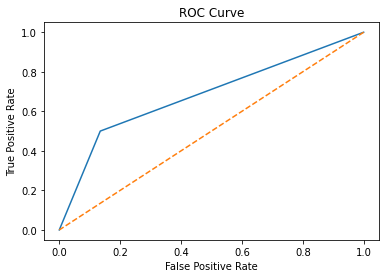

In [30]:
from sklearn.metrics import auc, roc_curve,RocCurveDisplay
fpr, tpr, thresholds = roc_curve(y_test, predicted_value)
area = auc(fpr, tpr)
print("Area under the curve: ", area)
plt.plot(fpr,tpr)
plt.plot([1,0],[1,0],linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()
